In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Importación de los archivos csv base

### A partir de estos archivos haremos las modificaciones necesarias para crear los csv específicos que serán consultados en cada función. Los csv de cada función serán más pequeños y específicos, por lo que utilizarán menos memoria y optimizarán el tiempo de cada consulta.

In [4]:
g = pd.read_csv(r'csv_ETL\games.csv')

In [5]:
games = pd.read_csv(r'csv_ETL\games_desanidado.csv')

In [6]:
reviews = pd.read_csv(r'csv_ETL\2reviews_desanidado.csv')

In [7]:
items = pd.read_csv(r'csv_ETL\items_desanidado.csv')

# Transformación para función 1

def userdata( User_id : str ): Debe devolver cantidad de dinero gastado por el usuario, el porcentaje de recomendación en base a reviews.recommend y cantidad de items.

### Quiero tener un DataFrame que tome los datos que necesito de los 3 df. Hago doble merge

In [9]:
# Realizamos el merge entre items (user_id, items_count y item_id) y games (item_id y price) utilizando las columna item_id como clave de unión
merged_1 = items.merge(games[['item_id', 'price']], how='inner', on='item_id')
# Seleccionamos las columnas que nos interesan
merged_1 = merged_1[['user_id', 'items_count', 'item_id', 'price']]

In [10]:
# Realizamos el merge entre merged_df y reviews (recommend) utilizando la columna user_id como clave de unión
merged_1 = merged_1.merge(reviews[['user_id', 'recommend']], how='inner', on='user_id')

In [13]:
merged_1.shape

(2434256, 5)

In [12]:
merged_1 = merged_1.drop_duplicates()

### Exportación del DataFrame merged_df, guardado como 1userdata.csv, que usaremos para la consulta de la función userdata

In [14]:
merged_1.to_csv(r'csv_funciones\1userdata.csv', index=False)

In [101]:
merged_1 = pd.read_csv(r'csv_funciones\1userdata.csv')

In [15]:
merged_1.head(2)

,user_id,items_count,item_id,price,recommend
0,76561197970982479,277,10,9.99,1
3,76561197970982479,277,20,4.99,1


# Transformación para función 2

def countreviews( YYYY-MM-DD y YYYY-MM-DD : str ): Cantidad de usuarios que realizaron reviews entre las fechas dadas y, el porcentaje de recomendación de los mismos en base a reviews.recommend.

### Convierto a datetime los valores de posted

In [16]:
# Convierto los valores a tipo date (esta conversión no se mantiene al exportar como csv, por eso no lo exporto)
reviews['posted'] = pd.to_datetime(reviews['posted'], errors='coerce')

código para la función 2:

primera parte. cantidad de usuarios

In [17]:
len(reviews.user_id[(datetime(2012, 7, 15) < reviews.posted) & (datetime(2013, 7, 15) > reviews.posted)].unique())

1612

segunda parte. recomendaciones

In [18]:
lista_user = reviews.user_id[(datetime(2012, 7, 15) < reviews.posted) & (datetime(2013, 7, 15) > reviews.posted)].unique()
lista_user

array(['doctr', 'maplemage', 'Wackky', ..., '76561198095271002',
       '76561198095921346', 'HarrisonDealSteam'], dtype=object)

In [19]:
recomendaciones_positivas = reviews.recommend[reviews.user_id.isin(lista_user)].sum()
recomendaciones_totales = reviews.recommend[reviews.user_id.isin(lista_user)].count()
porcentaje_recomendaciones = (recomendaciones_positivas/recomendaciones_totales)*100
porcentaje_recomendaciones

92.26112565445025

# Transformación para función 3

def genre( género : str ): Devuelve el puesto en el que se encuentra un género sobre el ranking de los mismos analizado bajo la columna PlayTimeForever.

### Quiero tener en un DataFrame todos los datos que necesito. Hago merge

In [ ]:
['Action',
 'Casual',
 'Indie',
 'Simulation',
 'Strategy',
 'Free to Play',
 'RPG',
 'Sports',
 'Adventure',
 'Racing',
 'Early Access',
 'Massively Multiplayer',
 'Animation &amp; Modeling',
 'Web Publishing',
 'Education',
 'Software Training',
 'Utilities',
 'Design &amp; Illustration',
 'Audio Production',
 'Video Production',
 'Photo Editing']

In [20]:
generos = ['genres.Action', 'genres.Casual', 'genres.Indie', 'genres.Simulation', 'genres.Strategy', 'genres.Free to Play', 'genres.RPG',
'genres.Sports', 'genres.Adventure', 'genres.Racing', 'genres.Early Access', 'genres.Massively Multiplayer', 'genres.Animation &amp; Modeling',
'genres.Web Publishing','genres.Education', 'genres.Software Training', 'genres.Utilities', 'genres.Design &amp; Illustration',
'genres.Audio Production', 'genres.Video Production', 'genres.Photo Editing']

In [21]:
generos_item = ['genres.Action', 'genres.Casual', 'genres.Indie', 'genres.Simulation', 'genres.Strategy', 'genres.Free to Play', 'genres.RPG',
'genres.Sports', 'genres.Adventure', 'genres.Racing', 'genres.Early Access', 'genres.Massively Multiplayer', 'genres.Animation &amp; Modeling',
'genres.Web Publishing','genres.Education', 'genres.Software Training', 'genres.Utilities', 'genres.Design &amp; Illustration',
'genres.Audio Production', 'genres.Video Production', 'genres.Photo Editing', 'item_id']

In [22]:
generos_playtime = ['genres.Action', 'genres.Casual', 'genres.Indie', 'genres.Simulation', 'genres.Strategy', 'genres.Free to Play', 'genres.RPG',
'genres.Sports', 'genres.Adventure', 'genres.Racing', 'genres.Early Access', 'genres.Massively Multiplayer', 'genres.Animation &amp; Modeling',
'genres.Web Publishing','genres.Education', 'genres.Software Training', 'genres.Utilities', 'genres.Design &amp; Illustration',
'genres.Audio Production', 'genres.Video Production', 'genres.Photo Editing', 'playtime_forever']

Hago un df con los 19 géneros como variables dummies y al final playtime_forever

In [23]:
# Realizo el merge entre items y games (traigo todos los genres y item_id). Utilizo la columna item_id como clave de unión
merged_3 = items.merge(games[generos_item], how='inner', on='item_id')
# Selecciono las columnas que me interesan (genres y playtime_forever)
merged_3 = merged_3[generos_playtime]

# Demora 12s

Cambio el nombre de las columnas con genres.

In [24]:
# Obtengo la lista de nombres de columnas
column_names = merged_3.columns.tolist()
# Elimino 'genres.' de los nombres de columnas
new_column_names = [name.replace('genres.', '') for name in column_names]
# Asigno los nuevos nombres de columna al DataFrame
merged_3.columns = new_column_names

In [25]:
ranking_3 = merged_3.copy()

Pondero cada género, al multiplicar por playtime de cada usuario, y luego sumarlo

In [26]:
# Convierto el DataFrame a un arreglo NumPy
data = ranking_3.to_numpy()
# Multiplico todas las columnas excepto la última por la última columna
data[:, :-1] *= data[:, -1].reshape(-1, 1)
# Creo un nuevo DataFrame a partir del arreglo NumPy
new_ranking_3 = pd.DataFrame(data, columns=ranking_3.columns)

Sumo cada columna, con Numpy para acelerar proceso

In [27]:
# Convierto el DataFrame a un arreglo NumPy
data = new_ranking_3.to_numpy()
# Sumo los valores de cada columna excepto la última utilizando NumPy
column_sums = np.sum(data[:, :-1], axis=0)
# Creo una lista de tuplas para almacenar los resultados de suma
sums_list = [(column, sum_value) for column, sum_value in zip(new_ranking_3.columns[:-1], column_sums)]
# Ahora 'sums_list' contiene las sumas de valores en forma de lista de tuplas
print(sums_list)

[('Action', 3080952217), ('Casual', 244567520), ('Indie', 1463369222), ('Simulation', 865034812), ('Strategy', 656668840), ('Free to Play', 585518437), ('RPG', 1020722128), ('Sports', 63855624), ('Adventure', 886287552), ('Racing', 62315437), ('Early Access', 158444758), ('Massively Multiplayer', 428298958), ('Animation &amp; Modeling', 437740), ('Web Publishing', 2545948), ('Education', 221541), ('Software Training', 79857), ('Utilities', 3024727), ('Design &amp; Illustration', 2514971), ('Audio Production', 70429), ('Video Production', 257951), ('Photo Editing', 51435)]


In [28]:
# Ordeno la lista de tuplas en función del valor de la suma en orden descendente
sorted_sums = sorted(sums_list, key=lambda x: x[1], reverse=True)
# Creo una nueva lista de tuplas con el ranking
ranking = [(column, rank + 1) for rank, (column, _) in enumerate(sorted_sums)]
# Ahora 'ranking' contiene el ranking ordenado de acuerdo a las sumas
print(ranking)

[('Action', 1), ('Indie', 2), ('RPG', 3), ('Adventure', 4), ('Simulation', 5), ('Strategy', 6), ('Free to Play', 7), ('Massively Multiplayer', 8), ('Casual', 9), ('Early Access', 10), ('Sports', 11), ('Racing', 12), ('Utilities', 13), ('Web Publishing', 14), ('Design &amp; Illustration', 15), ('Animation &amp; Modeling', 16), ('Video Production', 17), ('Education', 18), ('Software Training', 19), ('Audio Production', 20), ('Photo Editing', 21)]


# Transformación para función 4

def userforgenre( género : str ): Top 5 de usuarios con más horas de juego en el género dado, con su URL (del user) y user_id.

### Voy a hacer merge para quedarme un df con user_id, user_url, los 19 géneros y playtime_forever

In [29]:
items.head(2)

,user_id,items_count,user_url,item_id,item_name,playtime_forever
0,76561197970982479,277,http://steamcommunity.com/profiles/76561197970...,10,Counter-Strike,6
1,76561197970982479,277,http://steamcommunity.com/profiles/76561197970...,20,Team Fortress Classic,0


In [30]:
generos_item = ['genres.Action', 'genres.Casual', 'genres.Indie', 'genres.Simulation', 'genres.Strategy', 'genres.Free to Play', 'genres.RPG',
'genres.Sports', 'genres.Adventure', 'genres.Racing', 'genres.Early Access', 'genres.Massively Multiplayer', 'genres.Animation &amp; Modeling',
'genres.Web Publishing','genres.Education', 'genres.Software Training', 'genres.Utilities', 'genres.Design &amp; Illustration',
'genres.Audio Production', 'genres.Video Production', 'genres.Photo Editing', 'item_id']

In [31]:
generos_play_user = ['user_id', 'user_url', 'playtime_forever', 'genres.Action', 'genres.Casual', 'genres.Indie', 'genres.Simulation', 'genres.Strategy', 'genres.Free to Play', 'genres.RPG',
'genres.Sports', 'genres.Adventure', 'genres.Racing', 'genres.Early Access', 'genres.Massively Multiplayer', 'genres.Animation &amp; Modeling',
'genres.Web Publishing','genres.Education', 'genres.Software Training', 'genres.Utilities', 'genres.Design &amp; Illustration',
'genres.Audio Production', 'genres.Video Production', 'genres.Photo Editing']

In [32]:
# Realizo el merge entre items ('user_id', 'user_url', 'playtime_forever') y games (item_id y todos los genres.) Utilizo item_id como clave de unión
merged_4 = items.merge(games[generos_item], how='inner', on='item_id')
# Selecciono las columnas que me interesan ('user_id', 'user_url', 'playtime_forever' y 'genres')
merged_4 = merged_4[generos_play_user]

# Demora 14s

Cambio el nombre de las columnas con genres.

In [33]:
# Obtengo la lista de nombres de columnas
column_names = merged_4.columns.tolist()
# Elimino 'genres.' de los nombres de columnas
new_column_names = [name.replace('genres.', '') for name in column_names]
# Asigno los nuevos nombres de columna al DataFrame
merged_4.columns = new_column_names

Pondero cada género, al multiplicar por playtime de cada usuario, y luego sumarlo

In [34]:
ranking_4 = merged_4.copy()

In [35]:
# Convierto el DataFrame a un arreglo NumPy
data = ranking_4.to_numpy()
# Multiplico las columnas de la 4 a la 24 inclusive por la columna 3 utilizando NumPy
data[:, 3:25] *= data[:, 2].reshape(-1, 1)
# Creo un nuevo DataFrame a partir del arreglo NumPy
new_ranking_4 = pd.DataFrame(data, columns=ranking_4.columns)

# Demora 34s

Agrupo por user_id y user_url, para obtener la suma de tiempo jugado por usuario por género

In [42]:
# Realiza el groupby y la suma de las columnas. Son 68522 user_id, por lo tanto grouped_data tendrá 68522 filas y 24 columnas
grouped_data = new_ranking_4.groupby(['user_id', 'user_url'], as_index=False).sum()

# Demora 24s

In [43]:
grouped_data.sort_values(by='Simulation', ascending=False)[['user_id','user_url','Simulation']].head(5)

,user_id,user_url,Simulation
55748,clawbot44,http://steamcommunity.com/id/clawbot44,798258
45166,Evilutional,http://steamcommunity.com/id/Evilutional,684723
50069,REBAS_AS_F-T,http://steamcommunity.com/id/REBAS_AS_F-T,671567
59884,jimmynoe,http://steamcommunity.com/id/jimmynoe,645659
67844,wolop,http://steamcommunity.com/id/wolop,642773


### Exportación del DF grouped_data, guardado como 4userforgenre.csv, que usaremos para la consulta de la función userforgenre

In [44]:
grouped_data.to_csv(r'csv_funciones\4userforgenre.csv', index=False)

Prueba de código para la función:

In [45]:
gen = 'Simulation'

In [129]:
grouped_data = pd.read_csv(r'csv_funciones\4userforgenre.csv')

In [46]:
sorted_grouped_data = grouped_data.sort_values(by=gen, ascending=False)

In [47]:
# Obtén los cinco primeros registros y selecciona las columnas deseadas
top_records = sorted_grouped_data.head(5)[['user_id', 'user_url']]

# Crea un diccionario con la estructura deseada
result_dict = {}
count = 1
for _, row in top_records.iterrows():
    result_dict[f'usuario {count}'] = [row['user_id'], row['user_url']]
    count += 1

result_dict

{'usuario 1': ['clawbot44', 'http://steamcommunity.com/id/clawbot44'],
 'usuario 2': ['Evilutional', 'http://steamcommunity.com/id/Evilutional'],
 'usuario 3': ['REBAS_AS_F-T', 'http://steamcommunity.com/id/REBAS_AS_F-T'],
 'usuario 4': ['jimmynoe', 'http://steamcommunity.com/id/jimmynoe'],
 'usuario 5': ['wolop', 'http://steamcommunity.com/id/wolop']}

# Transformación para función 5

def developer( desarrollador : str ): Cantidad de items y porcentaje de contenido Free por año según empresa desarrolladora.

### Hago un DF que contenga solo developer, release_year y price. Le agrego un contador para luego hacer sum()

Paso release_date a formato fecha y luego me quedo solo con el año

In [48]:
g.release_date = pd.to_datetime(g.release_date, errors='coerce')

In [49]:
g['año'] = g['release_date'].dt.year

Hago un df con las 3 columnas que necesito

In [50]:
g_año = g[['developer', 'año', 'price']]

In [51]:
g_año['contador'] = 1

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2844\3852908329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g_año['contador'] = 1


### Exportación del DF g_año, guardado como 5developer.csv, que usaremos para la consulta de la función developer

In [54]:
g_año.to_csv(r'csv_funciones\5developer.csv', index=False)

In [140]:
g_año = pd.read_csv(r'csv_funciones\5developer.csv')

Prueba de código para la función

In [55]:
developer_name = 'Capcom'

In [56]:
# Filtra el DataFrame por el desarrollador deseado
filtered_data = g_año[g_año['developer'] == developer_name]

In [57]:
# Agrupa los datos por año y realiza las operaciones de conteo y porcentaje
grouped_data = filtered_data.groupby('año').agg(
    registros_distintos=('contador', 'sum'),
    porcentaje_price_0=('price', lambda x: round((x == 0.00).mean() * 100, 2))
)

In [58]:
# Convierte el DataFrame en un diccionario clave-valor
grouped_dict = grouped_data.reset_index().to_dict(orient='records')

# Imprime el diccionario
print(grouped_dict)

[{'año': 2008.0, 'registros_distintos': 2, 'porcentaje_price_0': 0.0}, {'año': 2009.0, 'registros_distintos': 3, 'porcentaje_price_0': 0.0}, {'año': 2011.0, 'registros_distintos': 8, 'porcentaje_price_0': 0.0}, {'año': 2013.0, 'registros_distintos': 14, 'porcentaje_price_0': 0.0}, {'año': 2014.0, 'registros_distintos': 12, 'porcentaje_price_0': 0.0}, {'año': 2015.0, 'registros_distintos': 24, 'porcentaje_price_0': 0.0}, {'año': 2016.0, 'registros_distintos': 7, 'porcentaje_price_0': 14.29}, {'año': 2017.0, 'registros_distintos': 37, 'porcentaje_price_0': 2.7}]


# Transformación para la función 6

def sentiment_analysis( año : int ): Según el año de lanzamiento, se devuelve una lista con la cantidad de registros de reseñas de usuarios que se encuentren categorizados con un análisis de sentimiento.

                    Ejemplo de retorno: {Negative = 182, Neutral = 120, Positive = 278}

En un nuevo DF voy a quedarme con columna 'año' de g, y con columna 'review' de reviews 

In [59]:
g.release_date = pd.to_datetime(g.release_date, errors='coerce')
g['año'] = g['release_date'].dt.year

In [60]:
g_año_item = g[['año', 'item_id']]

In [61]:
reviews_review_item = reviews[['review', 'item_id']]

In [62]:
merged_6 = g_año_item.merge(reviews_review_item, how='inner', on='item_id')
merged_6 = merged_6[['año', 'review']]

In [63]:
# Aplico one-hot encoding a la columna 'review'
dummies_review = pd.get_dummies(merged_6['review'], prefix='review')

# Concateno el DataFrame original con el DataFrame de reviews codificadas
dummies_6 = pd.concat([merged_6, dummies_review], axis=1)

me quedo solo con las columnas que voy a necesitar

In [64]:
dummies_6 = dummies_6[['año','review_0','review_1','review_2']]

In [65]:
dummies_agrupado = dummies_6.groupby('año', as_index=False).sum()

### Exportación del DF dummies_agrupado, guardado como 6sentiment_analysis.csv, que usaremos para la consulta de la función sentiment_analysis

In [68]:
dummies_agrupado.to_csv(r'csv_funciones\6sentiment_analysis.csv', index=False)

In [155]:
dummies_agrupado = pd.read_csv(r'csv_funciones\6sentiment_analysis.csv')

In [69]:
dummies_agrupado

,año,review_0,review_1,review_2
0,1989.0,0,0,1
1,1990.0,0,0,5
2,1991.0,0,0,1
3,1992.0,0,1,2
4,1993.0,0,2,3
5,1994.0,0,5,10
6,1995.0,1,2,13
7,1996.0,0,1,7
8,1997.0,4,6,38
9,1998.0,4,9,83


Prueba de código para la función

In [70]:
año = 2017

In [71]:
negativo = dummies_agrupado[dummies_agrupado['año'] == año].iloc[0][1]
neutral = dummies_agrupado[dummies_agrupado['año'] == año].iloc[0][2]
positivo = dummies_agrupado[dummies_agrupado['año'] == año].iloc[0][3]

In [72]:
dicc_sentimiento = {'negativo': negativo, 'neutral': neutral, 'positivo': positivo}

In [73]:
dicc_sentimiento

{'negativo': 119.0, 'neutral': 219.0, 'positivo': 1754.0}

# Transformación para la función 7

def recomendacion_juego( id de producto ): Ingresando el id de producto, deberíamos recibir una lista con 5 juegos recomendados similares al ingresado.

### Obtengo un DF con la info relevante de cada juego de games y le agrego un conteo de la columna recommend. 

In [74]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22530 entries, 0 to 22529
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   title                             22530 non-null  object 
 1   release_date                      22530 non-null  object 
 2   price                             22530 non-null  float64
 3   item_id                           22530 non-null  int64  
 4   developer                         22530 non-null  object 
 5   genres.Action                     22530 non-null  int64  
 6   genres.Casual                     22530 non-null  int64  
 7   genres.Indie                      22530 non-null  int64  
 8   genres.Simulation                 22530 non-null  int64  
 9   genres.Strategy                   22530 non-null  int64  
 10  genres.Free to Play               22530 non-null  int64  
 11  genres.RPG                        22530 non-null  int64  
 12  genr

Primero voy a hacer mi df games_7 que tendrá las variables importantes de games

In [75]:
generos_df = ['genres.Action', 'genres.Casual', 'genres.Indie', 'genres.Simulation', 'genres.Strategy', 'genres.Free to Play', 'genres.RPG',
'genres.Sports', 'genres.Adventure', 'genres.Racing', 'genres.Early Access', 'genres.Massively Multiplayer', 'genres.Animation &amp; Modeling',
'genres.Web Publishing','genres.Education', 'genres.Software Training', 'genres.Utilities', 'genres.Design &amp; Illustration',
'genres.Audio Production', 'genres.Video Production', 'genres.Photo Editing']

In [76]:
especificaciones = ['Single-player', 'Multi-player', 'Online Multi-Player', 'Cross-Platform Multiplayer', 'Steam Achievements',
 'Steam Trading Cards', 'In-App Purchases', 'Stats', 'Downloadable Content', 'Full controller support', 'Steam Cloud', 'Steam Leaderboards',
  'Partial Controller Support', 'Local Co-op', 'Shared/Split Screen', 'Valve Anti-Cheat enabled', 'Co-op', 'Captions available', 'Steam Workshop',
   'Includes level editor', 'Mods', 'MMO', 'Online Co-op', 'Local Multi-Player', 'Includes Source SDK', 'Commentary available',
    'Steam Turn Notifications', 'SteamVR Collectibles', 'Game demo', 'Mods (require HL2)']

In [ ]:
stop
especificaciones_df = []
for e in especificaciones:
    e = str('specs.'+ e)
    especificaciones_df.append(e)


In [78]:
especificaciones_df = ['specs.Single-player', 'specs.Multi-player', 'specs.Online Multi-Player', 'specs.Cross-Platform Multiplayer',
 'specs.Steam Achievements', 'specs.Steam Trading Cards', 'specs.In-App Purchases', 'specs.Stats', 'specs.Downloadable Content',
  'specs.Full controller support', 'specs.Steam Cloud', 'specs.Steam Leaderboards', 'specs.Partial Controller Support', 'specs.Local Co-op',
   'specs.Shared/Split Screen', 'specs.Valve Anti-Cheat enabled', 'specs.Co-op', 'specs.Captions available', 'specs.Steam Workshop',
    'specs.Includes level editor', 'specs.Mods', 'specs.MMO', 'specs.Online Co-op', 'specs.Local Multi-Player', 'specs.Includes Source SDK',
     'specs.Commentary available', 'specs.Steam Turn Notifications', 'specs.SteamVR Collectibles', 'specs.Game demo', 'specs.Mods (require HL2)']

In [79]:
columnas_df = ['item_id', 'price', 'release_date']

In [80]:
todas_las_columnas = columnas_df + generos_df + especificaciones_df

In [81]:
games_7 = games[todas_las_columnas]

In [82]:
games_7['release_date'] = pd.to_datetime(games_7['release_date'], errors='coerce')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2844\3955163516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_7['release_date'] = pd.to_datetime(games_7['release_date'], errors='coerce')


In [83]:
games_7['release_date'] = games_7['release_date'].dt.year

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2844\4228231512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_7['release_date'] = games_7['release_date'].dt.year


In [84]:
games_7.rename(columns={'release_date': 'año'}, inplace=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2844\4054958596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_7.rename(columns={'release_date': 'año'}, inplace=True)


In [85]:
games_7.shape

(22530, 54)

In [86]:
games_7.head(2)

,item_id,price,año,genres.Action,genres.Casual,genres.Indie,genres.Simulation,genres.Strategy,genres.Free to Play,genres.RPG,...,specs.Mods,specs.MMO,specs.Online Co-op,specs.Local Multi-Player,specs.Includes Source SDK,specs.Commentary available,specs.Steam Turn Notifications,specs.SteamVR Collectibles,specs.Game demo,specs.Mods (require HL2)
0,761140,4.99,2018.0,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,643980,0.00,2018.0,0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


# Ahora voy a sumar las recommend positivas de reviews y las recommend totales, agrupado por item_id

In [87]:
reviews_7 = reviews[['item_id', 'recommend']]

In [88]:
reviews_7['contador'] = 1

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2844\3786402450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_7['contador'] = 1


In [89]:
reviews_7 = reviews_7.groupby(['item_id'], as_index=False).sum()

In [90]:
reviews_7.shape

(3682, 3)

In [91]:
reviews_7.head(2)

,item_id,recommend,contador
0,10,56,57
1,20,11,17


# Ahora voy a obtener el playtime_forever por item_id del df items

In [92]:
items_7 = items[['item_id', 'playtime_forever']]

In [93]:
items_7 = items_7.groupby(['item_id'], as_index=False).sum()

In [94]:
items_7.shape

(10978, 2)

In [95]:
items_7.head(2)

,item_id,playtime_forever
0,10,17386015
1,20,961702


# Ahora voy a hacer merge entre games_7, items_7 y reviews_7

In [96]:
merged_7 = reviews_7.merge(items_7, how='outer', on='item_id')

In [97]:
merged_7 = merged_7.merge(games_7, how='outer', on='item_id')

La columna recommend la convierto a porcentaje de recomendaciones positivas (de 0 a 1)

In [98]:
merged_7['recommend'] = merged_7.recommend/merged_7.contador

# Normalización de año, playtime_forever, price y contador

In [99]:
df_7 = merged_7.copy() 

In [100]:
# Selecciono las características numéricas a normalizar
numeric_features = ['año', 'playtime_forever', 'price', 'contador']
# Creo un objeto MinMaxScaler
scaler = MinMaxScaler()
# Aplico la normalización a las características seleccionadas
df_7[numeric_features] = scaler.fit_transform(df_7[numeric_features])

In [ ]:
df_7.info()

### Exportación del DF df_7, guardado como recomendacion_juego.csv, que usaremos para la consulta de la función recomendacion_juego

In [102]:
df_7.to_csv(r'csv_funciones\7recomendacion_juego.csv', index=False)

Prueba de código para la función

In [188]:
df_7 = pd.read_csv(r'csv_funciones\7recomendacion_juego.csv')

In [103]:
# Imputo los valores faltantes con 0
imputer = SimpleImputer(strategy='constant', fill_value=0)
df_7i = imputer.fit_transform(df_7.drop('item_id', axis=1))  # Elimino la columna 'item_id'

In [104]:
# Convierto el array NumPy en un DataFrame de pandas
df_7i = pd.DataFrame(df_7i, columns=df_7.columns[1:])  # Ignoro la columna 'item_id' de df_7 ya eliminada en df_7i

In [106]:
# Creo una instancia de KMeans
kmeans = KMeans(n_clusters=5, random_state=0)

# Ajusto el modelo a los datos
kmeans.fit(df_7i)

# Obtengo las etiquetas de los clusters asignados a cada fila
etiquetas_clusters = kmeans.labels_

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


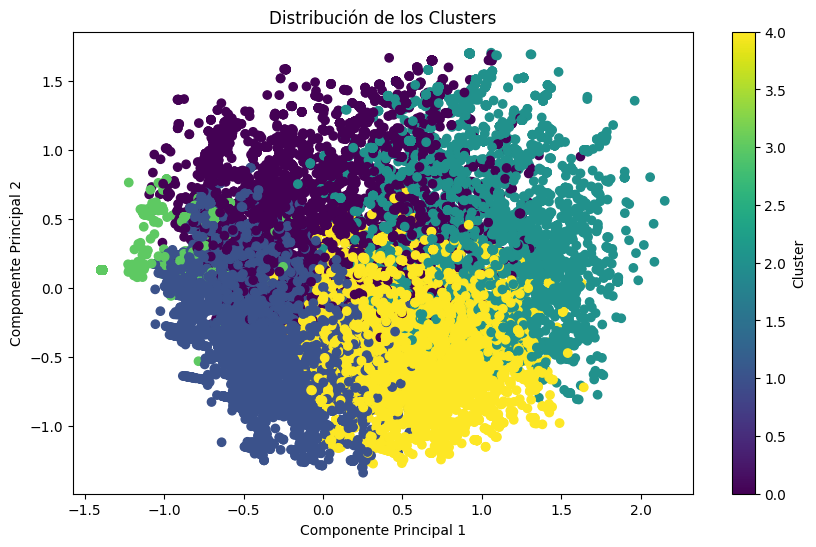

In [107]:
# Aplico PCA para reducir a dos dimensiones
pca = PCA(n_components=2)
df_2d = pca.fit_transform(df_7i)

# Creo un gráfico de dispersión con colores por cluster
plt.figure(figsize=(10, 6))
plt.scatter(df_2d[:, 0], df_2d[:, 1], c=etiquetas_clusters, cmap='viridis')
plt.title('Distribución de los Clusters')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()

In [108]:
def encontrar_item_id_cercanos(item_id):
    # Paso 1: Obtener el índice del item_id en el DataFrame original
    indice_item_id = df_7[df_7['item_id'] == item_id].index[0]
    
    # Paso 2: Encontrar a qué cluster pertenece el item_id
    cluster_item_id = etiquetas_clusters[indice_item_id]
    
    # Paso 3: Filtrar los índices de los item_id en el mismo cluster
    indices_mismo_cluster = np.where(etiquetas_clusters == cluster_item_id)[0]
    
    # Paso 4: Calcular las distancias y obtener los índices de los 5 más cercanos
    distancias = pairwise_distances(df_7i.iloc[indice_item_id].values.reshape(1, -1), df_7i.iloc[indices_mismo_cluster])
    indices_cercanos = np.argsort(distancias)[0][1:6]
    
    # Paso 5: Obtener los item_id de los 5 más cercanos
    item_id_cercanos = df_7.iloc[indices_mismo_cluster[indices_cercanos]]['item_id']
    
    return item_id_cercanos

# Llamo a la función para encontrar los 5 item_id más cercanos al item_id de interés
item_id_de_interes = 20 
item_id_cercanos = encontrar_item_id_cercanos(item_id_de_interes)

print("Los 5 item_id más cercanos al item_id", item_id_de_interes, "son:")
print(item_id_cercanos)

Los 5 item_id más cercanos al item_id 20 son:
2      30
15    360
0      10
5      60
3      40
Name: item_id, dtype: int64
